<a href="https://colab.research.google.com/github/priscilla1812/OIBSIP/blob/main/Task_5_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Priscilla Philby Oommen

## Oasis Infobyte Data Science Internship Oct - Nov 2023

## **TASK 5: SALES PREDICTION USING PYTHON**

**Problem Statement:**

Sales prediction means predicting how much of a product people will buy based on factord such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let's start the task of sales prediction with machine learning using Python.

sales prediction based on advertising expenditure features such as TV, newspaper, and radio.

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**I. Load the Dataset into pandas dataframe**

In [43]:
# Mount Drive and Read csv file
dfads = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Science/Advertising.csv")
# shows the datatype
type(dfads)

pandas.core.frame.DataFrame

In [44]:
# Displays the first 5 records of the dataset
dfads.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
# Drop the 'Unnamed: 0' column as it is not required for analysis
dfads = dfads.drop(columns=["Unnamed: 0"])

# Displays the first 5 records of the dataset
dfads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [46]:
# Displays the shape of a DataFrame
dfads.shape

# The DataFrame has a shape of (200, 4) , this implies that the DataFrame is made up of 200 rows and 4 columns of data.

(200, 4)

In [47]:
# Display information about the datatype of each column and null values
dfads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [48]:
# Checking for null values
dfads.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [49]:
# Display basic statistics about the data
dfads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [50]:
dfads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**II. Correlation Matrix**

A correlation matrix is a table showing correlation coefficients between variables.

In [51]:
# Compute the correlation matrix
# dfads.corr()
dfads.corr(numeric_only = True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

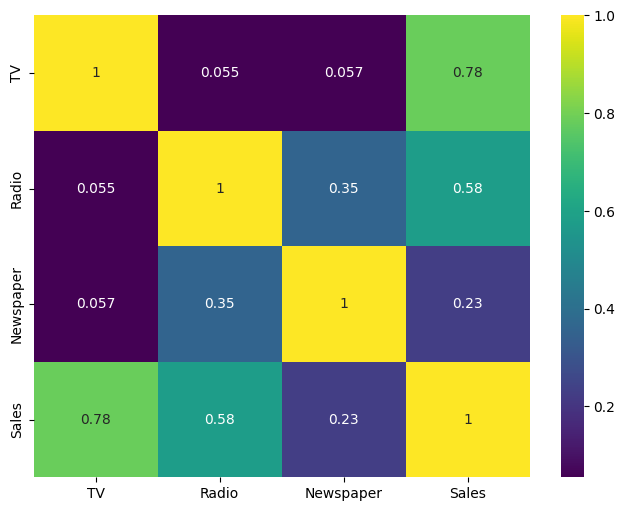

In [52]:
# display the correlation matrix using a heatmap
corr = dfads.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(8, 6))
# Compute the correlation matrix and plot it
sns.heatmap(corr, annot=True, ax=ax, cmap='viridis')

**III. Data Visualization**

**1, Pairplot**

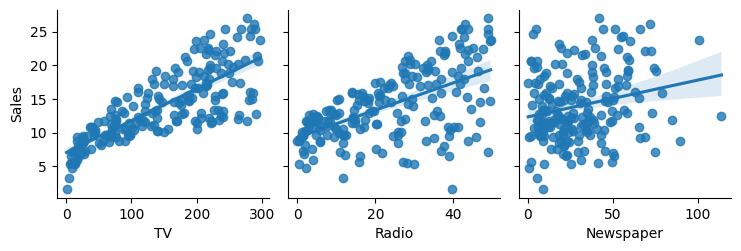

In [53]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)
sns.pairplot(data = dfads,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

**2, Scatterplot**

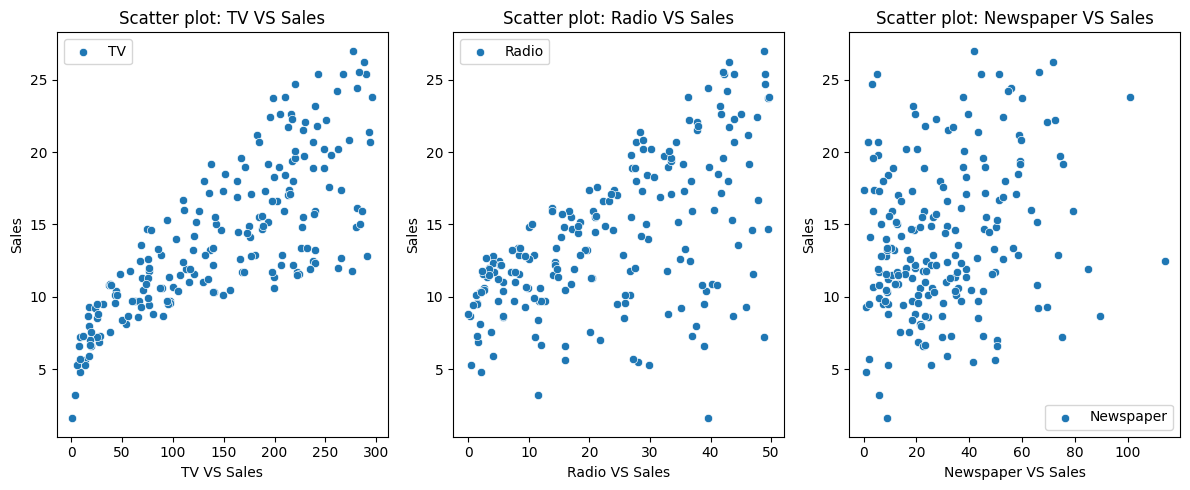

In [54]:
plt.figure(figsize=(12, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=dfads[col_name],y=dfads["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

**3, Distplot (Distribution Plot)**

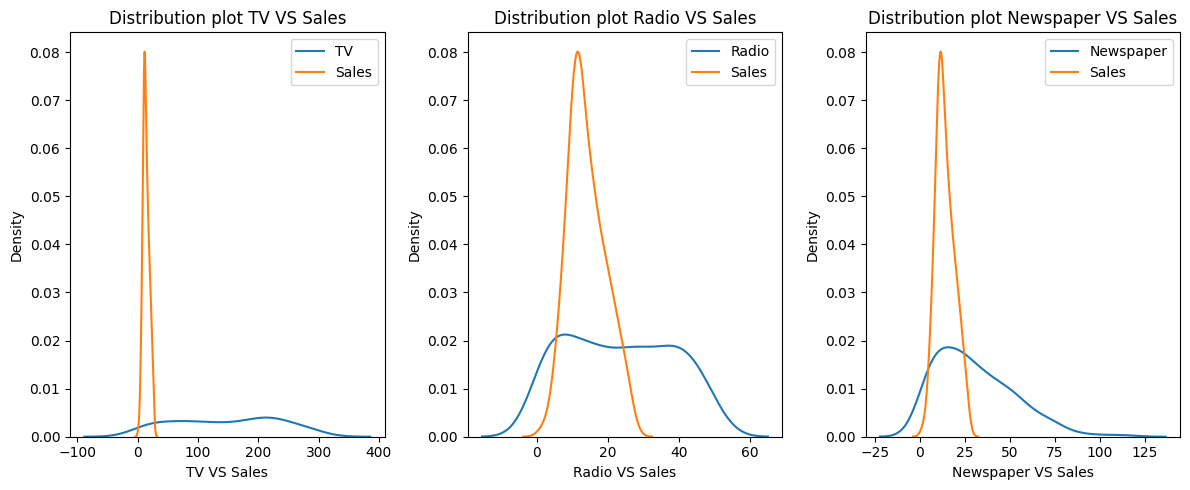

In [55]:
plt.figure(figsize=(12, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=dfads[col_name],hist=False, label= col_name)
    sns.distplot(x=dfads["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

**4, Histplot (Histogram Plot)**

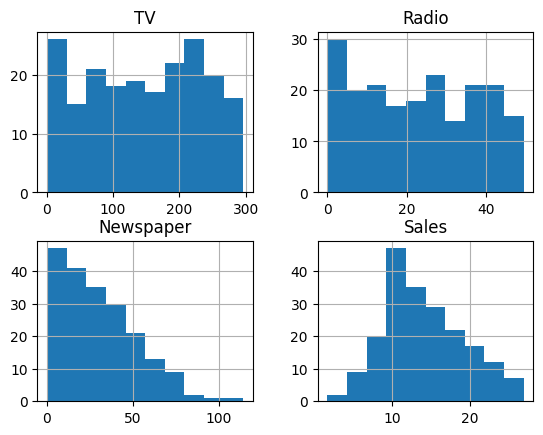

In [56]:
# Histograms to check the normality assumption of the dependent variable (Sales)
dfads.hist()
plt.show()

**5, Linear regression plot**

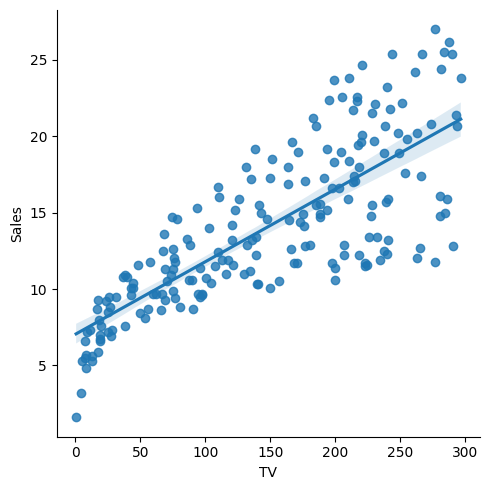

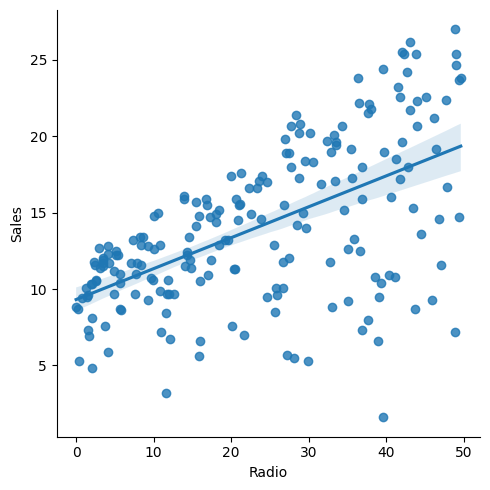

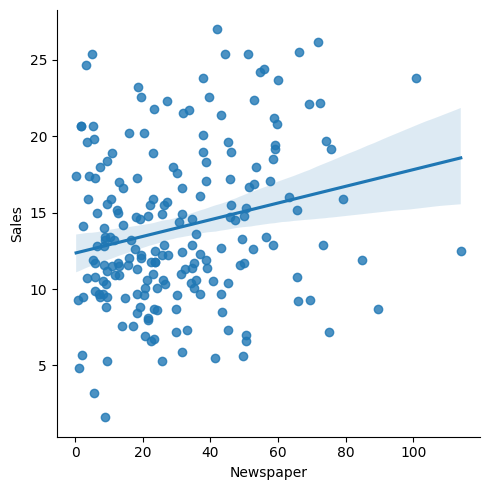

In [57]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable
# plt.figure(figsize=(8, 5))

sns.lmplot(x='TV', y='Sales', data=dfads, height=5)
sns.lmplot(x='Radio', y='Sales', data=dfads, height=5)
sns.lmplot(x='Newspaper',y= 'Sales', data=dfads, height=5)

# To make a larger square, just increase the height:
# To make it wider as well, increase the aspect ratio
# Since, height * aspect = width

In [58]:
dfads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**IV. Preprocessing the Dataset & Model Preparation**

In [59]:
# Checking for null values
dfads.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X = dfads.drop('Sales', axis=1)
y = dfads['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# With random_state=42 , we get the same train and test sets across different executions
# The train and test sets directly affect the model's performance score.
# random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic.

In [61]:
# Label Encoder
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

lab = LabelEncoder()
y = lab.fit_transform(y)

In [62]:
# StandardScaler() standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

# print metric to get performance
print("Accuracy (Linear Regression): ", model.score(X_test, y_test) * 100)

Accuracy (Linear Regression):  89.9438024100912


**Lineplot**

The performance of the model is evaluated using the following metrics:
R-squared (R2) score: A measure of how well the model captures the variance in the target variable (sales).
Mean Squared Error (MSE): A measure of the average squared difference between predicted and actual sales values.
Cross-Validation Score: To ensure the model's generalization ability and minimize overfitting.

Linear Regression
Mean Squared Error: 3.1740973539761033
R2 Score: 0.899438024100912
Cross-Validation R2: 0.8594884313276513


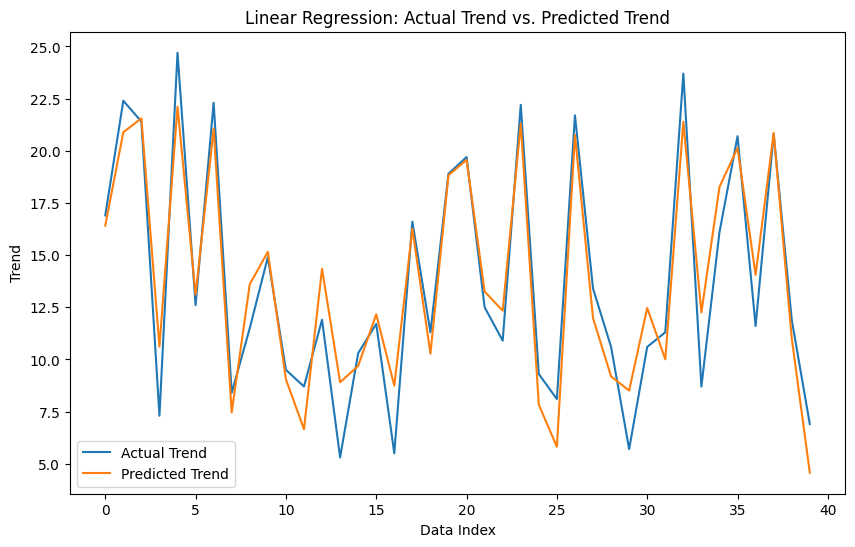

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# The performance of the model is evaluated using the following metrics:
# Mean Squared Error (MSE): A measure of the average squared difference between predicted and actual sales values.
mse = mean_squared_error(y_test, y_pred)

# R-squared (R2) score: A measure of how well the model captures the variance in the target variable (sales).
r2 = r2_score(y_test, y_pred)

# Cross-Validation Score: To ensure the model's generalization ability and minimize overfitting.
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("Linear Regression")
print("Mean Squared Error: {}".format(mse))
print("R2 Score: {}".format(r2))
print("Cross-Validation R2: {}".format(cv_scores.mean()))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title(f'Linear Regression: Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()
print()

**V. Prediction**

In [72]:
# Make predictions on new data
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [16.98079966]


**VI. Confusion Matrix**

* Confusion matrix is used to evaluate classification models.
* It is not used to evaluate linear regression models.